In [85]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import skew
import matplotlib.pyplot as plt
import scipy.stats as st

In [ ]:
Coeficiente de correlacón de las variables numéricas del dataset.
Sesgos de alguna de las variables numéricas del dataset.
Intervalo de confianza de algunas de las variables numéricas del dataset
Interpretación de los resultados.
Ahora interpreta los resultados obtenidos de los diferentes estadísticos estudiados haciendo incapié en aspectos interesantes de tus datos y explica lo mejor 
posible la naturaleza de los mismos.

In [2]:
df = pd.read_csv("books.csv")
df.head(2)

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction


Hacemos una copia de nuestro df para utilizarlo en algunos ejercicios.

In [3]:
df_copia = df.copy()

# Ejercicio 1

- Tablas de contigencia

In [4]:
min = df["User Rating"].describe()[3]
min

3.3

In [5]:
max = df["User Rating"].describe()[6]
max

4.8

Obtengo el valor mín y max de mi columna saber el rango en el que varía sus datos y así calcular los diferentes intervalos de datos (bins)

In [6]:
bins = np.arange(min-0.5,max+1, 0.50)
bins

array([2.8, 3.3, 3.8, 4.3, 4.8, 5.3])

In [7]:
df_copia["User_rating_group"] = pd.cut(df["User Rating"], bins = bins)
df_copia.sample(25)

,Name,Author,User Rating,Reviews,Price,Year,Genre,User_rating_group
337,The 7 Habits of Highly Effective People: Power...,Stephen R. Covey,4.7,4725,16,2017,Non Fiction,"(4.3, 4.8]"
420,The Legend of Zelda: Hyrule Historia,Patrick Thorpe,4.9,5396,20,2013,Fiction,"(4.8, 5.3]"
200,Killing Patton: The Strange Death of World War...,Bill O'Reilly,4.6,10927,6,2014,Non Fiction,"(4.3, 4.8]"
471,The Tipping Point: How Little Things Can Make ...,Malcolm Gladwell,4.4,3503,9,2009,Non Fiction,"(4.3, 4.8]"
466,The Subtle Art of Not Giving a F*ck: A Counter...,Mark Manson,4.6,26490,15,2019,Non Fiction,"(4.3, 4.8]"
268,Pokémon Deluxe Essential Handbook: The Need-to...,Scholastic,4.7,3503,9,2016,Fiction,"(4.3, 4.8]"
19,Alexander Hamilton,Ron Chernow,4.8,9198,13,2016,Non Fiction,"(4.3, 4.8]"
13,A Wrinkle in Time (Time Quintet),Madeleine L'Engle,4.5,5153,5,2018,Fiction,"(4.3, 4.8]"
424,The Life-Changing Magic of Tidying Up: The Jap...,Marie Kondō,4.5,22641,11,2016,Non Fiction,"(4.3, 4.8]"
533,When Breath Becomes Air,Paul Kalanithi,4.8,13779,14,2016,Non Fiction,"(4.3, 4.8]"


Hemos creado una columna nueva *'User_rating_group'* asignando a nuestra columna *'User rating'* un intervalo (bins) u otro dependiendo de su valor. Observamos cuántos registros se han clasificado en cada uno de los intervalos. Por simple curiosidad.

In [8]:
df_copia["User_rating_group"].value_counts()

(4.3, 4.8]    438
(3.8, 4.3]     56
(4.8, 5.3]     52
(3.3, 3.8]      3
(2.8, 3.3]      1
Name: User_rating_group, dtype: int64

Creamos la tabla de contingencia

In [9]:
contig_num= pd.crosstab(df_copia["User_rating_group"], df_copia["Genre"], margins =True )
contig_num

Genre,Fiction,Non Fiction,All
User_rating_group,,,
"(2.8, 3.3]",1,0,1
"(3.3, 3.8]",3,0,3
"(3.8, 4.3]",26,30,56
"(4.3, 4.8]",169,269,438
"(4.8, 5.3]",41,11,52
All,240,310,550


Hemos hecho nuestra tabla de contigencia con una variable numérica y una categórica. 
Observamos que los libros del género **Non Fiction** tiene una frecuencia mayor en altas valoraciones (ratings) de l@s usuria@s. En todos los rangos

También vemos que la frecuencia de valoraciones media-altas (de 4.3 a 4.8) es muy superior tanto para el género **Fiction** como **Non Fiction** respecto a las de valores bajas o medias-bajas (2.8, 3.3 hasta 3.8, 4.3 ). Esto tiene sentido porque nuestros datos son los libros más vendidos (mejor valorados -> más se venden)

# Bonus

In [69]:
############# Estoy probando a hacer cosas extra (o bonus) para que quede todo más profesional :) No sé si saldrá, lo dejo indicado.
########### añade tantos por cientos a la tabla de contigencia. Cçomo? Apply

In [60]:
contig_num["All"]

User_rating_group
(2.8, 3.3]      1
(3.3, 3.8]      3
(3.8, 4.3]     56
(4.3, 4.8]    438
(4.8, 5.3]     52
All           550
Name: All, dtype: int64

In [ ]:
# total  550     100
#        1         x 

# 1*100 / 550

In [55]:
contig_num["All_prueba"] = contig_num["All"].copy()

In [59]:
def percentage(col):
    for i in range(len(col)):
        print(i)

        perc = (col[i] * 100) / col[len(col)-1]
        
        return perc
percentage(contig_num["All_prueba"])

0


0.18181818181818182

In [ ]:
contig_num["All_prueba"] = contig_num["All"].apply(lambda x: x/x.sum())

# Se acaba Bonus

In [10]:
contig = pd.crosstab(df["Genre"], df["Author"])
contig

Author,Abraham Verghese,Adam Gasiewski,Adam Mansbach,Adir Levy,Admiral William H. McRaven,Adult Coloring Book Designs,Alan Moore,Alex Michaelides,Alice Schertle,Allie Brosh,...,Todd Burpo,Tony Hsieh,Tucker Carlson,Veronica Roth,W. Cleon Skousen,Walter Isaacson,William Davis,William P. Young,Wizards RPG Team,Zhi Gang Sha
Genre,,,,,,,,,,,,,,,,,,,,,
Fiction,2,0,1,1,0,0,1,1,1,0,...,0,0,0,4,0,0,0,2,3,0
Non Fiction,0,1,0,0,1,1,0,0,0,1,...,2,1,1,0,1,3,2,0,0,2


Hemos intentando tilizar dos variables categóricas de nuestro df pero observamos que en principio no podemos sacar conclusiones debido a la naturaleza de nuestros datos.

# Coeficiente de correlación

- Coeficiente de correlación de Pearson de nuestras variables numéricas

In [11]:
df.head(2)

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction


In [12]:
df_copia.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre,User_rating_group
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction,"(4.3, 4.8]"
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction,"(4.3, 4.8]"
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction,"(4.3, 4.8]"
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction,"(4.3, 4.8]"
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction,"(4.3, 4.8]"


In [13]:
df_copia["Year"] = df_copia["Year"].astype("object")

In [24]:
df_numericas = df.select_dtypes(exclude = "object")
df_numericas

,User Rating,Reviews,Price,Year
0,4.7,17350,8,2016
1,4.6,2052,22,2011
2,4.7,18979,15,2018
3,4.7,21424,6,2017
4,4.8,7665,12,2019
...,...,...,...,...
545,4.9,9413,8,2019
546,4.7,14331,8,2016
547,4.7,14331,8,2017
548,4.7,14331,8,2018


In [25]:
del df_numericas["Year"]

In [26]:
df_numericas

,User Rating,Reviews,Price
0,4.7,17350,8
1,4.6,2052,22
2,4.7,18979,15
3,4.7,21424,6
4,4.8,7665,12
...,...,...,...
545,4.9,9413,8
546,4.7,14331,8
547,4.7,14331,8
548,4.7,14331,8


In [77]:
###################### DUDA EXISTENCIAL: year debería ser categórica?
############ He cambiado la columna a categórica porque no tiene sentido en dejarla numérica en este caso.

In [27]:
df_numericas.dtypes

User Rating    float64
Reviews          int64
Price            int64
dtype: object

In [28]:
cor2 = np.corrcoef(df_numericas)
cor2

array([[1.        , 0.99997389, 0.99999995, ..., 1.        , 1.        ,
        1.        ],
       [0.99997389, 1.        , 0.99997605, ..., 0.99997414, 0.99997414,
        0.99997414],
       [0.99999995, 0.99997605, 1.        , ..., 0.99999996, 0.99999996,
        0.99999996],
       ...,
       [1.        , 0.99997414, 0.99999996, ..., 1.        , 1.        ,
        1.        ],
       [1.        , 0.99997414, 0.99999996, ..., 1.        , 1.        ,
        1.        ],
       [1.        , 0.99997414, 0.99999996, ..., 1.        , 1.        ,
        1.        ]])

In [80]:
cor = np.corrcoef(df["User Rating"],df["Price"])
cor

array([[ 1.        , -0.13308629],
       [-0.13308629,  1.        ]])

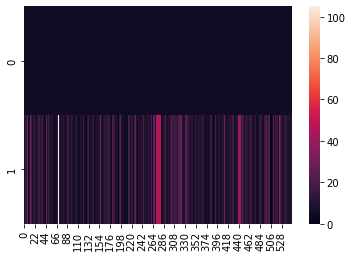

In [84]:
fig = sns.heatmap(data = (df["User Rating"],df["Price"]))

# Sesgo

- Sesgos de alguna variable numérica

In [30]:
df.head(2)

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction


In [32]:
media = np.mean(df["Price"])
media

13.1

In [33]:
std = np.std(df["Price"])
std

10.83240089227266

In [34]:
sesgo = skew(df["Price"])
sesgo
# intentamos dibujar la media y la desviación típica como una línea en nuestro gráfico de barrras ¿varianza, no sé cuál sería más adecuado) en el histograma 

3.674998760184651

Como nuestro valor del sesgo es positivo, deducimos que nuestros valores de Price están sesgado de forma positiva, a la izquierda. 

In [38]:
df.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


In [ ]:
x1 = media
x2 = std

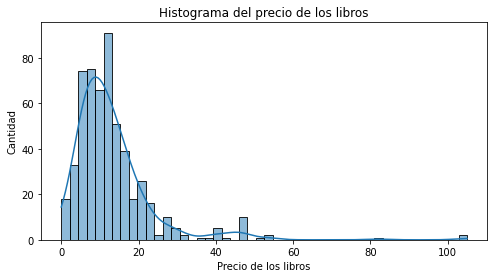

In [44]:
plt.figure(figsize =(8,4))
fig = sns.histplot(x=df["Price"], kde = True)
fig.set(xlabel='Precio de los libros', ylabel = 'Cantidad')
fig.set_title('Histograma del precio de los libros')
plt.show()

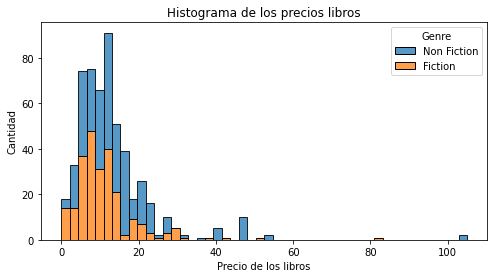

In [51]:
plt.figure(figsize =(8,4))
fig = sns.histplot(x=df["Price"],  data = df, hue ="Genre",multiple = "stack")
fig.set(xlabel='Precio de los libros', ylabel = 'Cantidad')
fig.set_title('Histograma de los precios libros')
plt.show()

Como observamos en el histograma, confirmamos que los valores de nuestros precios están sesgados a la izquierda. Así, se soportan nuestras conclusiones del sesgo y de la media.

También se confirma que

Nos preguntamos si existe relación entre el precio del libro y su valoración por los usuarios.

In [55]:
r2_price_ratings = np.corrcoef(df["Price"], df["User Rating"])
r2_price_ratings

array([[ 1.        , -0.13308629],
       [-0.13308629,  1.        ]])

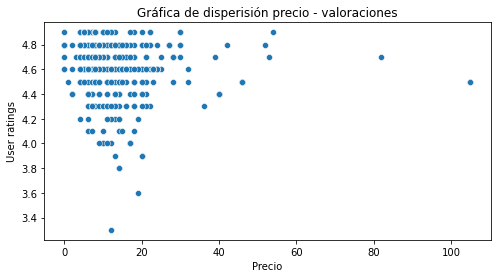

In [54]:
plt.figure(figsize =(8,4))
fig = sns.scatterplot(x=df["Price"], y=df["User Rating"], data = df)
fig.set(xlabel='Precio', ylabel = 'User ratings')
fig.set_title('Gráfica de disperisión precio - valoraciones')
plt.show()

In [60]:
df_copia

,Name,Author,User Rating,Reviews,Price,Year,Genre,User_rating_group
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction,"(4.3, 4.8]"
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction,"(4.3, 4.8]"
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction,"(4.3, 4.8]"
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction,"(4.3, 4.8]"
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction,"(4.3, 4.8]"
...,...,...,...,...,...,...,...,...
545,Wrecking Ball (Diary of a Wimpy Kid Book 14),Jeff Kinney,4.9,9413,8,2019,Fiction,"(4.8, 5.3]"
546,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2016,Non Fiction,"(4.3, 4.8]"
547,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2017,Non Fiction,"(4.3, 4.8]"
548,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2018,Non Fiction,"(4.3, 4.8]"


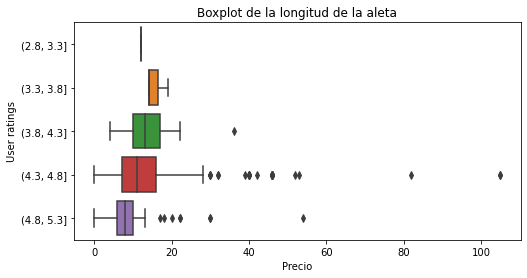

In [79]:
# Boxplot por vertical, por isla
plt.figure(figsize =(8,4))
fig = sns.boxplot(x= df_copia["Price"], y = df_copia["User_rating_group"], data = df_copia)
fig.set(xlabel='Precio', ylabel= 'User ratings' )
fig.set_title('Boxplot de la longitud de la aleta')
plt.show()


In [77]:
df_copia.dtypes

Name                   object
Author                 object
User Rating           float64
Reviews                 int64
Price                   int64
Year                   object
Genre                  object
User_rating_group    category
dtype: object

Nos preguntamos cuántos libros se han publicado cada año respecto a su sexo.

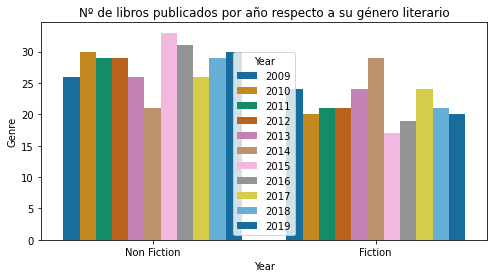

In [76]:
plt.figure(figsize =(8,4))
fig = sns.countplot(x= df_copia["Genre"],data = df_copia, hue = "Year", palette ="colorblind")
fig.set(xlabel='Year', ylabel= 'Genre')
fig.set_title('Nº de libros publicados por año respecto a su género literario')
plt.show()

# Intervalo de confianza

In [87]:
df_numericas

,User Rating,Reviews,Price
0,4.7,17350,8
1,4.6,2052,22
2,4.7,18979,15
3,4.7,21424,6
4,4.8,7665,12
...,...,...,...
545,4.9,9413,8
546,4.7,14331,8
547,4.7,14331,8
548,4.7,14331,8


In [106]:
df_numericas["User Rating"]

0     4.70
1     4.60
2     4.70
3     4.70
4     4.80
      ... 
545   4.90
546   4.70
547   4.70
548   4.70
549   4.70
Name: User Rating, Length: 550, dtype: float64

In [103]:
data = df_numericas["User Rating"]

In [105]:
pd.options.display.float_format = '{:.2f}'.format
intervalos = st.t.interval(alpha = 0.95, df = df_numericas["User Rating"], loc= np.mean(data),scale=st.sem(data))
print(intervalos)
print(np.mean(data))

(array([4.592999  , 4.59281932, 4.592999  , 4.592999  , 4.59316927,
       4.59242842, 4.592999  , 4.592999  , 4.592999  , 4.59281932,
       4.59281932, 4.59281932, 4.59281932, 4.59262942, 4.59281932,
       4.59262942, 4.59281932, 4.59242842, 4.59262942, 4.59316927,
       4.59281932, 4.59281932, 4.59121795, 4.59281932, 4.59221535,
       4.59281932, 4.592999  , 4.59198909, 4.59281932, 4.59281932,
       4.59316927, 4.592999  , 4.59316927, 4.59316927, 4.59316927,
       4.592999  , 4.592999  , 4.592999  , 4.59281932, 4.59262942,
       4.59333083, 4.59333083, 4.59316927, 4.59281932, 4.59316927,
       4.59262942, 4.592999  , 4.592999  , 4.592999  , 4.592999  ,
       4.592999  , 4.592999  , 4.592999  , 4.59221535, 4.59316927,
       4.59316927, 4.59281932, 4.59281932, 4.59316927, 4.59242842,
       4.59281932, 4.59221535, 4.59198909, 4.59316927, 4.59316927,
       4.59316927, 4.59316927, 4.59281932, 4.59281932, 4.59262942,
       4.59262942, 4.59316927, 4.59316927, 4.59316927, 4.5928

In [107]:
######################## NO ENTIENDO POR QUÉ SON TANTOS NÚMEROS Y NO APARECE UUNO SOLO

In [ ]:
############################## ESTO SON LOS APUNTES
data = iris['sepal_length']

# Utilizamos Scipy para calcular el intervalo de confianza del 95% de la media de los datos.
# Dicho intervalo nos indica donde está la media de los valores de longitud de los sépalos con un 95 de probabilidad.
print(st.t.interval(alpha=0.95, df=len(data)-1, loc=np.mean(data), scale=st.sem(data)))

# Lo comparamos con la media obtenido de los datos disponibles hasta el momento
print(np.mean(data))